Simple Q-learning implementation to the Open AI Gym CartPole problem

In [1]:
import gym
import numpy as np
import random
from statistics import mean, stdev
import matplotlib.pyplot as plt 
from IPython.display import clear_output

env = gym.make('CartPole-v0')

In [2]:
Observation = [50, 50, 50, 50]
np_array_win_size = np.array([0.25, 0.25, 0.01, 0.1])

q_table = np.random.uniform(low=0, high=1, size=(Observation + [env.action_space.n]))
print('Q Table Shape:', q_table.shape)
print((np.shape(env.observation_space),env.action_space.n))

(50, 50, 50, 50, 2)
((4,), 2)


In [3]:
def get_discrete_state(state):
    discrete_state = state/np_array_win_size+ np.array([15,10,1,10])
    return tuple(discrete_state.astype(np.int))

In [4]:
# Q-learning implementation:

# Define paramaters:
alpha = 0.1
gamma = 0.9
epsilon = 0.9
EPISODES = 100000
total_reward = []
epoch_count = []
discounted_rewards = []
ep_reward, reward_cnt, epoch_counts = 0, 0, 0

In [5]:
%%time

for i in range(EPISODES+1):
    discrete_state = get_discrete_state(env.reset())
    done = False
    while not done:
        if random.uniform(0,1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[discrete_state])

        new_state, reward, done, info = env.step(action)

        old_q = q_table[discrete_state,(action,)]
        new_discrete_state = get_discrete_state(new_state)
        next_max_q = np.max(q_table[new_discrete_state])

        new_q_value = old_q + alpha*(reward + gamma*next_max_q - old_q)

        q_table[discrete_state,(action,)] = new_q_value
        
        ep_reward += reward
        discrete_state = new_discrete_state
        
    epoch_counts += 1
    epoch_count.append(epoch_counts)

    reward_cnt += ep_reward
    total_reward.append(reward_cnt)

    # if i> 2:
    #     discounted_reward=(reward_cnt-mean(total_reward))/stdev(total_reward)
    #     discounted_rewards.append(discounted_reward)

    if i > 40000:
        epsilon = epsilon*0.1

    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")
    
    if i % 10 == 0:
        env.render()
    
    
env.close()
print("Training finished.\n")

Episode: 100000
Training finished.

Wall time: 6min 34s


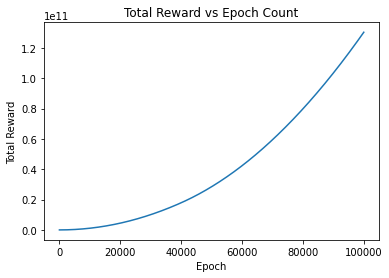

In [6]:
line2d = plt.plot(epoch_count,total_reward)
plt.xlabel('Epoch')
plt.ylabel('Total Reward')
plt.title('Total Reward vs Epoch Count')
plt.show()